# Session 10: Decision Tree Classification with Bank data

This notebook provides an example code of predicting whether a customer will default or not given the explanatory variables. 

Dependent variable describes default - <b>y(1-yes, 0-no)</b> 

The general sequence of steps that we will follow is the following:

- Data manipulation
    - Describing the data (checking for NAs, 0 variance, etc)
    - Creating dummy variables from categorical variables
    - Doing train and test split
- Model construction and interpretation
    - Model 1: Decision Tree Classification (the tree is fully grown)
    - Model 2: Decision Tree Classification (Pre-pruning the tree)
- Sensitivity (recall), Specificity, Overall Accuracy, ROC Curve
    - Predicting probabilities for train and test data
    - Getting classification report for train and test data
    - Calculating ROC_AUC, and drawing ROC curve
- Gain and Lift Chart from scikitplot


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from  sklearn.metrics import roc_auc_score, roc_curve
import scikitplot as skplt #in case of error run <<!pip install scikit-plot>> and run the code again

In [2]:
data=pd.read_excel("bank.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp_var_rate      4119 non-null float64
cons_price_idx    4119 non-null float64
cons_conf_idx     4119 non-null float64
euribor3m         4119 non-null float64
nr_employed       4119 non-null float64
y                 4119 non-null int64
dtypes: float64(5), int64(5), object(10)
memory usage: 643.7+ KB


In [4]:
data.var()==0

age               False
duration          False
campaign          False
previous          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
y                 False
dtype: bool

In [5]:
#to check whether there is a variable with 1 unique value (if there is we will drop it)
data.nunique()

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          828
campaign           25
previous            7
poutcome            3
emp_var_rate       10
cons_price_idx     26
cons_conf_idx      26
euribor3m         234
nr_employed        11
y                   2
dtype: int64

In [6]:
#getting dummy variables from object type variables
data=pd.get_dummies(data,drop_first=True)

In [7]:
Y=data.y
X=data.drop("y",axis=1)

In [8]:
print(data.y.value_counts()/len(data)*100)

0    89.05074
1    10.94926
Name: y, dtype: float64


<b>About 89% of bank customers didn't have default.This means that without any model we will probably clasify a new record (a new customer) as 0 with accuracy of 89%, but we want to do better than this very naive classification. </b>

In [9]:
#let's split the data into train and test sets
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# Model 1: Decision Tree Classification (the tree is fully grown)

In [12]:
#running and fitting Decision Tree
tree_1=DecisionTreeClassifier(random_state=42)
tree_1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [13]:
#to check accuracy scores for training and testing data
print("Accuracy_Train:",tree_1.score(x_train,y_train)*100)
print("Accuracy_Test:",tree_1.score(x_test,y_test)*100)
print("ROC AUC Train:",roc_auc_score(y_train,tree_1.predict(x_train))*100)
print("ROC AUC Test:",roc_auc_score(y_test,tree_1.predict(x_test))*100)

Accuracy_Train: 100.0
Accuracy_Test: 89.2233009708738
ROC AUC Train: 100.0
ROC AUC Test: 73.34817559692794


<b>Thre tree overfits on the train data.</b>

# Model 2: Decision Tree Classification (Pre-pruning the tree)

<b>As the previous model overfits the tarin data, let's define max depth of tree to be 5 using <code>max_depth</code> parameter.</b>

In [14]:
#running and fitting Decision Tree
tree_2=DecisionTreeClassifier(random_state=42,max_depth=5)
tree_2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [15]:
#to check accuracy scores for training and testing data
print("Accuracy_Train:",tree_2.score(x_train,y_train)*100)
print("Accuracy_Test:",tree_2.score(x_test,y_test)*100)
print("ROC AUC Train:",roc_auc_score(y_train,tree_2.predict(x_train))*100)
print("ROC AUC Test:",roc_auc_score(y_test,tree_2.predict(x_test))*100)

Accuracy_Train: 93.23405632890903
Accuracy_Test: 90.97087378640776
ROC AUC Train: 75.33231361378814
ROC AUC Test: 69.06782615625218


<b>Again the tree overfits on the train data, but compared to the first model it performs better. </b>

In [16]:
#let's get sensitivity and specificity for train and test set
print("Train:",classification_report(y_test,tree_2.predict(x_test)))

Train:              precision    recall  f1-score   support

          0       0.93      0.97      0.95       921
          1       0.61      0.41      0.49       109

avg / total       0.90      0.91      0.90      1030



In [17]:
#To plot ROC curve, we should get TPR(sensitivity), FPR(1-Specificity) for different thresholds
FPR,TPR,thresholds=roc_curve(y_test,tree_2.predict_proba(x_test)[:,1])

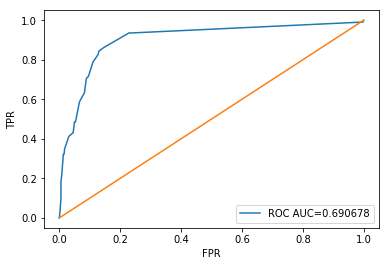

In [18]:
#plotting ROC Curve
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test,tree_2.predict(x_test)))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [19]:
#lets get feature importances
feature_imp=pd.DataFrame(tree_2.feature_importances_,index=X.columns,columns=["Feature Importances"])
feature_imp.sort_values(by="Feature Importances",ascending=False)

,Feature Importances
duration,0.477420
nr_employed,0.312673
cons_conf_idx,0.067318
poutcome_success,0.044787
cons_price_idx,0.029760
age,0.018408
campaign,0.014548
euribor3m,0.008428
month_oct,0.008302
default_unknown,0.006999


<b>Duration has the highest importance, i.e. 47.74% of total Gini reduction happened as a result of
splits based on duration. </b>

In [20]:
#let's visually see the tree
tree_gr=export_graphviz(tree_1,out_file="tree1.txt", max_depth=5, class_names=True, feature_names=X.columns, filled=True) 
#Go to http://webgraphviz.com/, enter the code from the text file saved

# Gain, Lift Chart

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


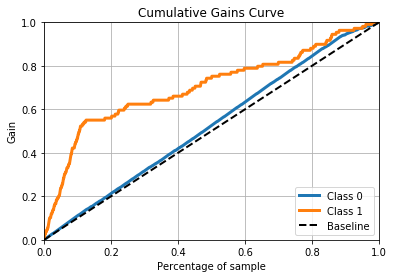

In [21]:
#Cummulative gain curve
skplt.metrics.plot_cumulative_gain(y_test,tree_1.predict_proba(x_test))

C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


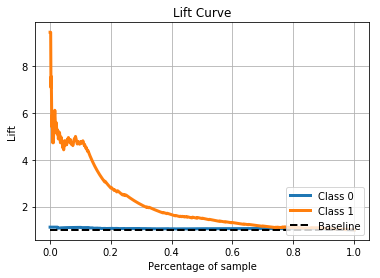

In [22]:
#lift curve
skplt.metrics.plot_lift_curve(y_test,tree_1.predict_proba(x_test))